# <p style="text-align: center;">Analysis of Student Performance in INSY107: Information Technology Today (2020-2023)</p>

#### <p style="text-align: center;">*Analysed by: Mr. Jefferson Mwatati*</p>

## Background Information

The objective of this analysis is to comprehensively assess the performance of students enrolled in the university course unit, INSY107 Information Technology Today, spanning the years 2020 to 2023. The findings from this analysis will provide valuable insights and trends to inform teaching methods and course management. 

### Key questions guiding this analysis include:

1. Are there discernible differences in the academic performance between male and female students?
2. Is there significant variation in the performance of students across different academic years?
3. Do student grades exhibit a tendency to improve over the four-year period?
4. How has the overall performance of students in INSY107 evolved from 2020 to 2023?
5. Is there any correlation between gender and academic performance in INSY107?
6. To what extent does student attendance impact their final grades in the course?
7. Can any discernible trends or patterns be identified in student attendance throughout the four-year duration?
8. Is there a noteworthy correlation between assignment scores and final exam scores?
9. Are there specific years in which students exhibited exceptional or subpar performance in INSY107?
10. Is there an observable correlation between attendance and assignment completion rates among students?

By addressing these key questions, we aim to gain a comprehensive understanding of student performance in INSY107 and provide data-driven insights to enhance the teaching and management of this course unit.

## Data Set & Privacy
* **Dataset:** **The data was cleaned using Excel to ensure there are no missing values.** The dataset (technology_today_107.csv) contains 2027 rows of student data across 8 columns, that include:
    * student ID 
    * gender 
    * year
    * attendance (5%)
    * assignments (10%)
    * tests (10%)
    * mid-semester-exam (15%)
    * final exam (60%) 
    * ***Grand Total = 5+10+10+15+60 = 100%***

* **Privacy:** This dataset uses anonymized student IDs and excludes university and student names for brevity and data privacy, all other data points in this dataset are genuine. 

## Grading Scale
![grading-scale.PNG](img/grading-scale.PNG)

In [1]:
#Import libraries that we shall need

import pandas as pd                 #for data manipulation and analysis  
import numpy as np                  #for Numerical calculations
import matplotlib.pyplot as plt     #data visualization library 
import seaborn as sns               #creating statistical graphics

In [2]:
#read the dataset content

df = pd.read_csv("files/technology_today_107.csv")

In [3]:
#Understanding structure and content
#View your dataset properties
df

,student_id,Gender,year,attendance,assignments,tests,mid_sem_exam,final_exam
0,stu0001,M,2020,4,7,9,11,39
1,stu0002,M,2020,4,4,4,5,33
2,stu0003,F,2020,4,8,7,10,36
3,stu0004,M,2020,2,6,7,11,35
4,stu0005,M,2020,3,8,7,9,34
...,...,...,...,...,...,...,...,...
2022,stu2023,F,2022,5,7,6,0,46
2023,stu2024,M,2022,5,9,0,11,40
2024,stu2025,M,2022,4,8,9,12,41
2025,stu2026,F,2022,5,7,5,11,28


In [4]:
#Check number of rows and columns in the dataset
df.shape

(2027, 8)

In [5]:
# Check for any missing values in the dataset

print("\nMissing values in the dataset:")
print(df.isnull().sum())


Missing values in the dataset:
student_id      0
Gender          0
year            0
attendance      0
assignments     0
tests           0
mid_sem_exam    0
final_exam      0
dtype: int64


Please observe that two crucial columns, namely **Grand Total** and **Final Grade**, are absent from the displayed information. Fortunately, we can calculate these ourselves using the information given on how to find the Grand Total and how to convert it to a Final Grade using the grading scale.

#### Add Grand Total Column

In [6]:
# Create the 'grand_total' column
df['grand_total'] = df['attendance'] + df['assignments'] + df['tests'] + df['mid_sem_exam'] + df['final_exam']

# Display the updated DataFrame with the grand_total column
df.head()

,student_id,Gender,year,attendance,assignments,tests,mid_sem_exam,final_exam,grand_total
0,stu0001,M,2020,4,7,9,11,39,70
1,stu0002,M,2020,4,4,4,5,33,50
2,stu0003,F,2020,4,8,7,10,36,65
3,stu0004,M,2020,2,6,7,11,35,61
4,stu0005,M,2020,3,8,7,9,34,61


#### Add Final Grade column

In [7]:
# Add the 'final_grade' column based on the scale below

def assign_final_grade(score):
    if 80 <= score <= 100:
        return 'A'
    elif 75 <= score <= 79:
        return 'A-'
    elif 70 <= score <= 74:
        return 'B+'
    elif 65 <= score <= 69:
        return 'B'
    elif 60 <= score <= 64:
        return 'B-'
    elif 55 <= score <= 59:
        return 'C+'
    elif 50 <= score <= 54:
        return 'C'
    elif 45 <= score <= 49:
        return 'C-'
    elif 40 <= score <= 44:
        return 'D'
    else:
        return 'F'

# Apply the function to create the 'final_grade' column
df['final_grade'] = df['grand_total'].apply(assign_final_grade)

# Display the updated Dataset with final_grade column
df.head()

,student_id,Gender,year,attendance,assignments,tests,mid_sem_exam,final_exam,grand_total,final_grade
0,stu0001,M,2020,4,7,9,11,39,70,B+
1,stu0002,M,2020,4,4,4,5,33,50,C
2,stu0003,F,2020,4,8,7,10,36,65,B
3,stu0004,M,2020,2,6,7,11,35,61,B-
4,stu0005,M,2020,3,8,7,9,34,61,B-


In [32]:
# Extracting unique years from the 'year' column
unique_years = sorted(df['year'].unique())

# Creating a new DataFrame with only the 'Years Available' column
years_df = pd.DataFrame({'Years Available': unique_years})

print(years_df)

   Years Available
0             2020
1             2021
2             2022
3             2023


### 2020 Statistical Analysis

In [8]:
# Filter the Dataset to include only data for the year 2020
df_2020 = df[df['year'] == 2020]

# Calculate the number of students who took exams in 2020
num_students_2020 = len(df_2020)
# Display the result
print("Number of students who took exams in 2020:", num_students_2020)


Number of students who took exams in 2020: 258


In [9]:
# Group the filtered DataFrame by 'Gender' and count the occurrences
gender_counts_2020 = df_2020['Gender'].value_counts()

# Display the counts with a clear format
print("Number of students who took exams in 2020, by gender:")
for gender, count in gender_counts_2020.items():
    print(f"{gender}: {count}")

Number of students who took exams in 2020, by gender:
M: 140
F: 118


In [10]:
# Count the number of students in terms of attendance for the year 2020
attendance_counts_2020 = df_2020['attendance'].value_counts().sort_index()

# Display the counts
print("Number of students in terms of attendance for the year 2020:")
for attendance, count in attendance_counts_2020.items():
    print(f"{attendance} % Attendance: {count} students")


Number of students in terms of attendance for the year 2020:
0 % Attendance: 13 students
2 % Attendance: 36 students
3 % Attendance: 48 students
4 % Attendance: 79 students
5 % Attendance: 82 students


### 2020 Visualization

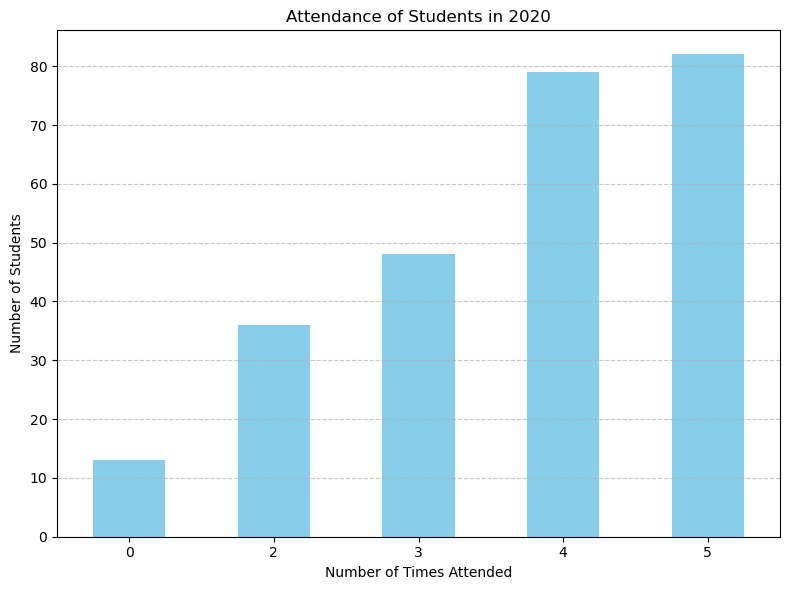

In [11]:
# Create a bar plot to show Attendance of Students in 2020
plt.figure(figsize=(8, 6))
attendance_counts_2020.plot(kind='bar', color='skyblue')
plt.title('Attendance of Students in 2020')
plt.xlabel('Number of Times Attended')
plt.ylabel('Number of Students')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

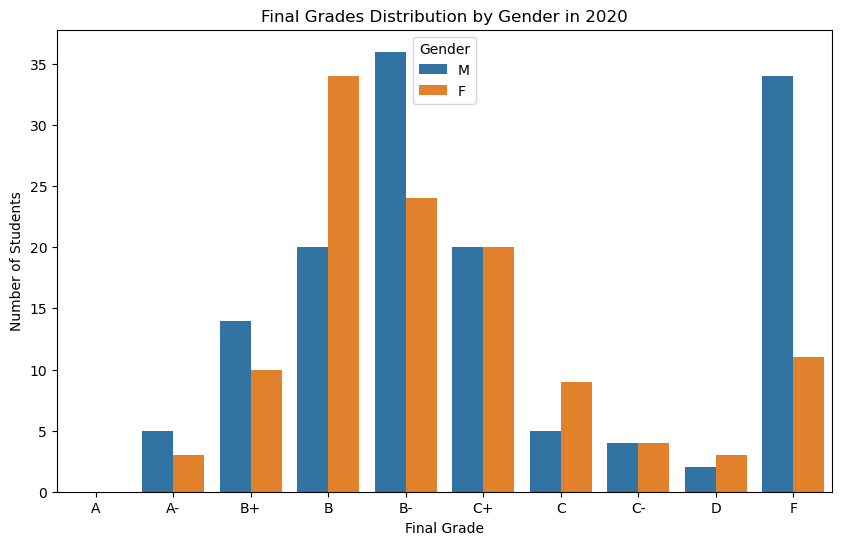

In [13]:
# Compare final grades
plt.figure(figsize=(10, 6))
sns.countplot(data=df_2020, x='final_grade', hue='Gender', order=['A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D', 'F'])
plt.title('Final Grades Distribution by Gender in 2020')
plt.xlabel('Final Grade')
plt.ylabel('Number of Students')
plt.legend(title='Gender')
plt.show()


### 2021 Statistical Analysis

In [14]:
# Filter the Dataset to include only data for the year 2020
df_2021 = df[df['year'] == 2021]

# Calculate the number of students who took exams in 2020
num_students_2021 = len(df_2021)
# Display the result
print("Number of students who took exams in 2021:", num_students_2021)

Number of students who took exams in 2021: 602


In [15]:
# Group the filtered DataFrame by 'Gender' and count the occurrences
gender_counts_2021 = df_2021['Gender'].value_counts()

# Display the counts with a clear format
print("Number of students who took exams in 2020, by gender:")
for gender, count in gender_counts_2021.items():
    print(f"{gender}: {count}")

Number of students who took exams in 2020, by gender:
M: 328
F: 274


In [16]:
# Count the number of students in terms of attendance for the year 2020
attendance_counts_2021 = df_2021['attendance'].value_counts().sort_index()

# Display the counts
print("Number of students in terms of attendance for the year 2021:")
for attendance, count in attendance_counts_2021.items():
    print(f"{attendance} % Attendance: {count} students")

Number of students in terms of attendance for the year 2021:
0 % Attendance: 10 students
2 % Attendance: 4 students
3 % Attendance: 170 students
4 % Attendance: 264 students
5 % Attendance: 154 students


### 2021 Visualization

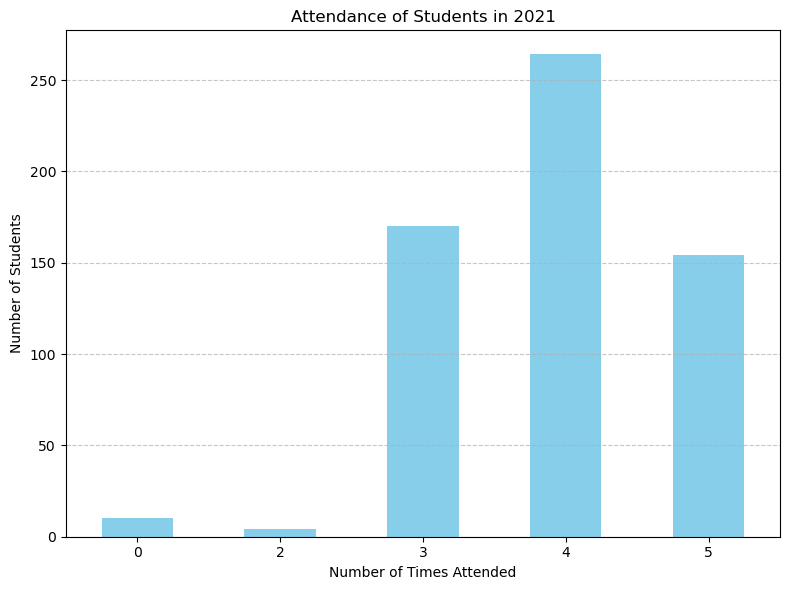

In [17]:
# Create a bar plot to show Attendance of Students in 2020
plt.figure(figsize=(8, 6))
attendance_counts_2021.plot(kind='bar', color='skyblue')
plt.title('Attendance of Students in 2021')
plt.xlabel('Number of Times Attended')
plt.ylabel('Number of Students')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

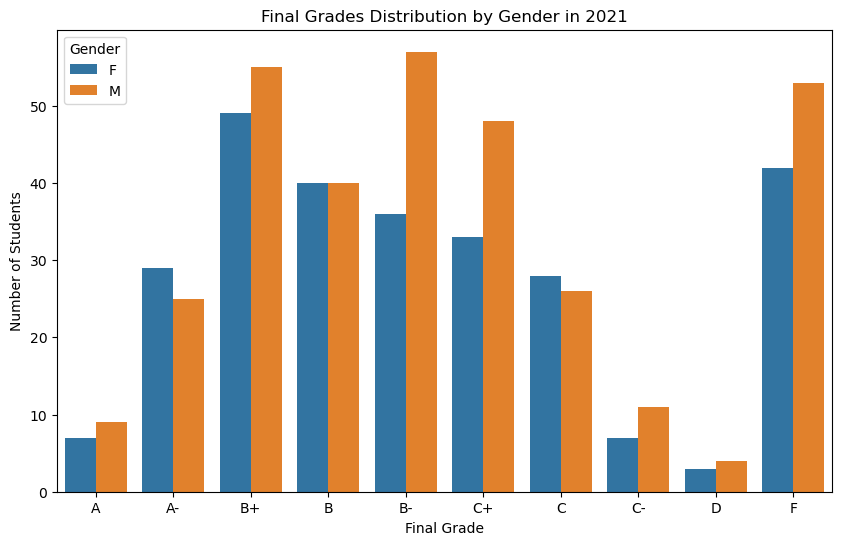

In [18]:
# Compare final grades
plt.figure(figsize=(10, 6))
sns.countplot(data=df_2021, x='final_grade', hue='Gender', order=['A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D', 'F'])
plt.title('Final Grades Distribution by Gender in 2021')
plt.xlabel('Final Grade')
plt.ylabel('Number of Students')
plt.legend(title='Gender')
plt.show()

### 2022 Statistical Analysis

In [20]:
# Filter the Dataset to include only data for the year 2022
df_2022 = df[df['year'] == 2022]

# Calculate the number of students who took exams in 2022
num_students_2022 = len(df_2022)
# Display the result
print("Number of students who took exams in 2022:", num_students_2022)

Number of students who took exams in 2022: 681


In [21]:
# Group the filtered DataFrame by 'Gender' and count the occurrences
gender_counts_2022 = df_2022['Gender'].value_counts()

# Display the counts with a clear format
print("Number of students who took exams in 2022, by gender:")
for gender, count in gender_counts_2022.items():
    print(f"{gender}: {count}")

Number of students who took exams in 2022, by gender:
M: 342
F: 339


In [22]:
# Count the number of students in terms of attendance for the year 2022
attendance_counts_2022 = df_2022['attendance'].value_counts().sort_index()

# Display the counts
print("Number of students in terms of attendance for the year 2022:")
for attendance, count in attendance_counts_2022.items():
    print(f"{attendance} % Attendance: {count} students")

Number of students in terms of attendance for the year 2022:
0 % Attendance: 12 students
1 % Attendance: 2 students
2 % Attendance: 23 students
3 % Attendance: 135 students
4 % Attendance: 187 students
5 % Attendance: 322 students


### 2022 Visualization

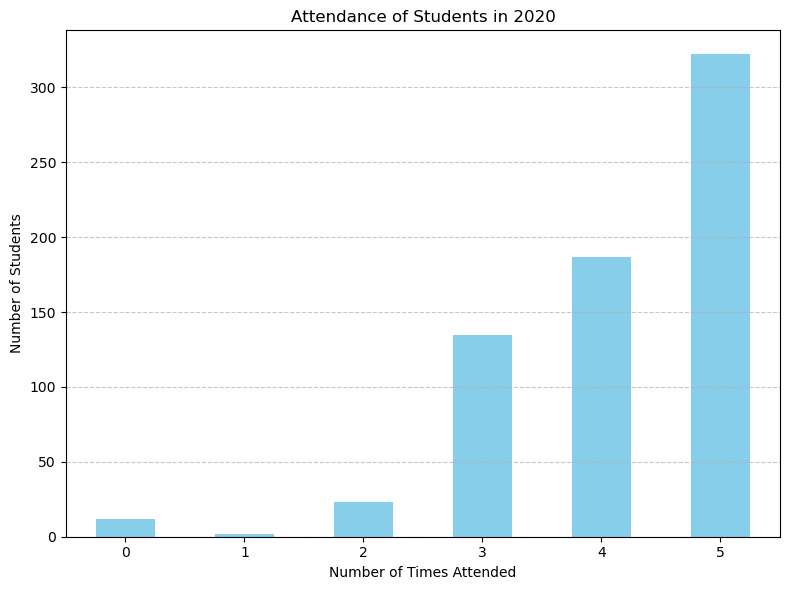

In [23]:
# Create a bar plot to show Attendance of Students in 2022
plt.figure(figsize=(8, 6))
attendance_counts_2022.plot(kind='bar', color='skyblue')
plt.title('Attendance of Students in 2020')
plt.xlabel('Number of Times Attended')
plt.ylabel('Number of Students')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

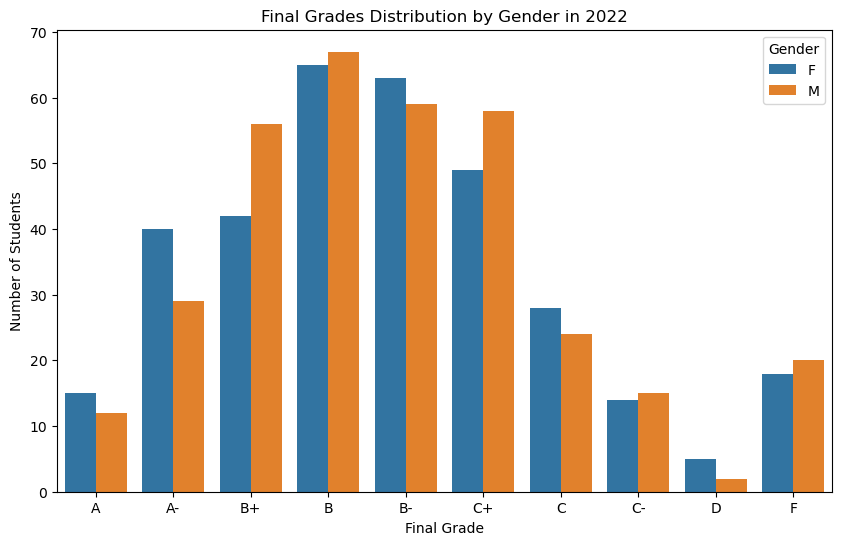

In [24]:

# Compare final grades
plt.figure(figsize=(10, 6))
sns.countplot(data=df_2022, x='final_grade', hue='Gender', order=['A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D', 'F'])
plt.title('Final Grades Distribution by Gender in 2022')
plt.xlabel('Final Grade')
plt.ylabel('Number of Students')
plt.legend(title='Gender')
plt.show()

### 2023 Statistical Analysis

In [33]:
# Filter the Dataset to include only data for the year 2023
df_2023 = df[df['year'] == 2023]

# Calculate the number of students who took exams in 2023
num_students_2023 = len(df_2023)
# Display the result
print("Number of students who took exams in 2023:", num_students_2023)


Number of students who took exams in 2023: 486


In [34]:
# Group the filtered DataFrame by 'Gender' and count the occurrences
gender_counts_2023 = df_2023['Gender'].value_counts()

# Display the counts with a clear format
print("Number of students who took exams in 2023, by gender:")
for gender, count in gender_counts_2023.items():
    print(f"{gender}: {count}")

Number of students who took exams in 2023, by gender:
F: 251
M: 235


In [35]:
# Count the number of students in terms of attendance for the year 2023
attendance_counts_2023 = df_2023['attendance'].value_counts().sort_index()

# Display the counts
print("Number of students in terms of attendance for the year 2023:")
for attendance, count in attendance_counts_2023.items():
    print(f"{attendance} % Attendance: {count} students")

Number of students in terms of attendance for the year 2023:
0 % Attendance: 7 students
1 % Attendance: 14 students
2 % Attendance: 38 students
3 % Attendance: 156 students
4 % Attendance: 172 students
5 % Attendance: 99 students


### 2023 Visualization

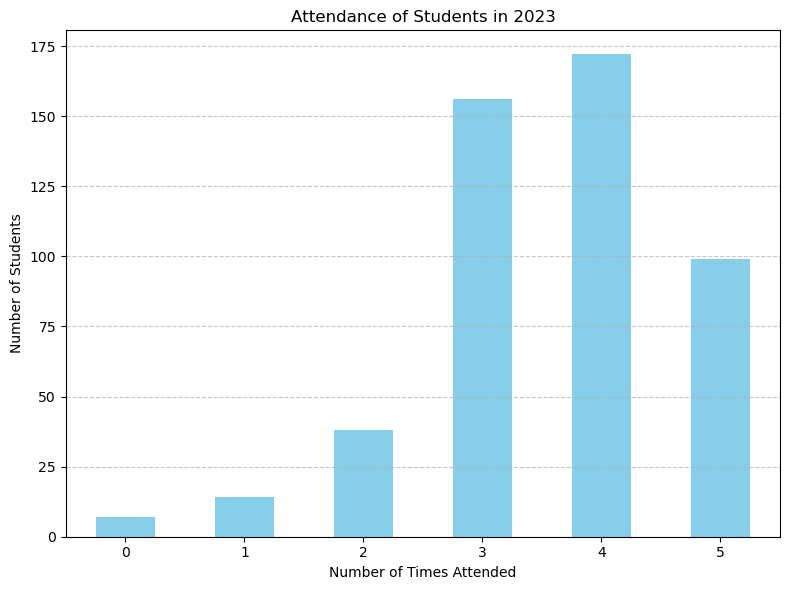

In [36]:
# Create a bar plot to show Attendance of Students in 2023
plt.figure(figsize=(8, 6))
attendance_counts_2023.plot(kind='bar', color='skyblue')
plt.title('Attendance of Students in 2023')
plt.xlabel('Number of Times Attended')
plt.ylabel('Number of Students')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

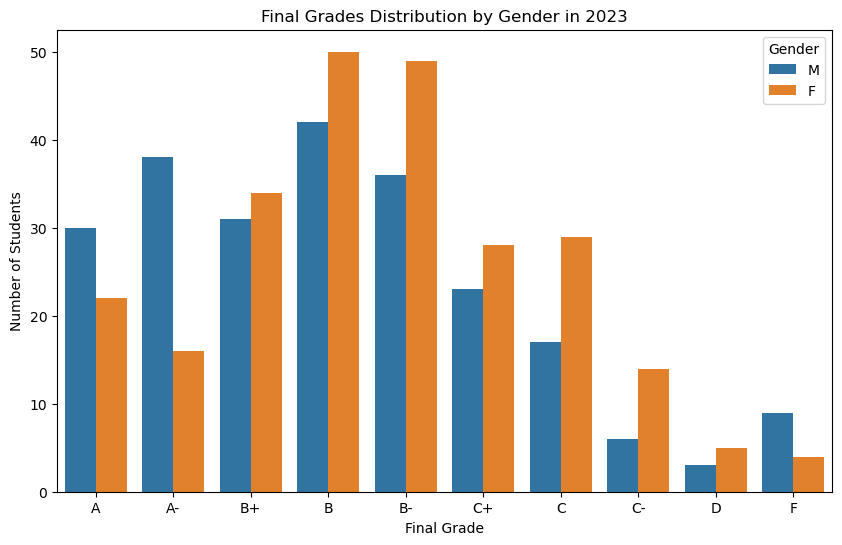

In [37]:
# Compare final grades
plt.figure(figsize=(10, 6))
sns.countplot(data=df_2023, x='final_grade', hue='Gender', order=['A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D', 'F'])
plt.title('Final Grades Distribution by Gender in 2023')
plt.xlabel('Final Grade')
plt.ylabel('Number of Students')
plt.legend(title='Gender')
plt.show()